In [72]:
import tensorflow as tf

In [73]:
from tensorflow import keras

In [74]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [75]:
#Import necessary modules and dependencies
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display


# Set seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)



In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [76]:
#Import necessary modules and dependencies
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display


# Set seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [77]:
import os
import random
import sys

## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display as display 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import plotly.graph_objs as go
#import plotly.offline as py
#import plotly.tools as tls
import seaborn as sns


import tensorflow as tf
#py.init_notebook_mode(connected=True)


import moviepy.editor as mp


# from skimage.restoration import denoise_wavelet
## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile as wav
from tqdm import tqdm

# from IPython.display import Audio
import matplotlib.pyplot as plt
    
input_duration=3


In [78]:
#Import necessary modules and dependencies
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display


# Set seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [79]:
#download a portion of the Speech Commands dataset. 
#portion of the dataset to save time with data loading. Extract the mini_speech_commands.zip 
#load it in using the tf.data API.

data_dir = pathlib.Path('Documents/FYP/New folder2')

#Check basic statistics about the dataset.

commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != 'README.md']
print('Commands:', commands)


Commands: ['fold1' 'fold10' 'fold11' 'fold12' 'fold13' 'fold2' 'fold3' 'fold4'
 'fold5' 'fold6' 'fold7' 'fold8' 'fold9']


In [80]:
# #Check basic statistics about the dataset.

# commands = np.array(tf.io.gfile.listdir(str(data_dir)))
# commands = commands[commands != 'README.md']
# print('Commands:', commands)

In [81]:
fn = 'Documents/FYP/New folder2/fold1/Paragraph 1.wav'
librosa_audio, librosa_sample_rate = librosa.load(fn)
scipy_sample_rate, scipy_audio = wav.read(fn)
print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

Original sample rate: 44100
Librosa sample rate: 22050


In [82]:
# # To get the location of file name (Used to fixed the error 2-Not found directory or file)   
# file_name = 'Paragraph 1.wav'
  
#   # prints the absolute path of current
# # working directory with  file name
# print(os.path.abspath(file_name))

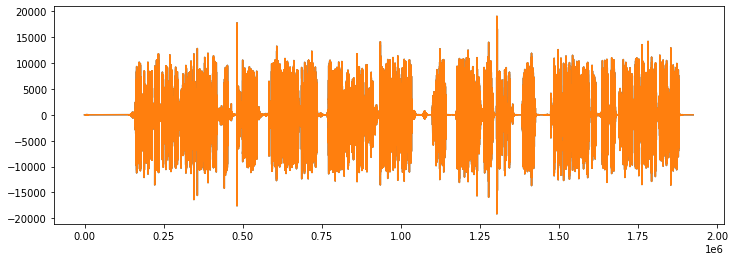

In [83]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)
# plt.savefig('original_audio.png')
plt.show('original_audi')

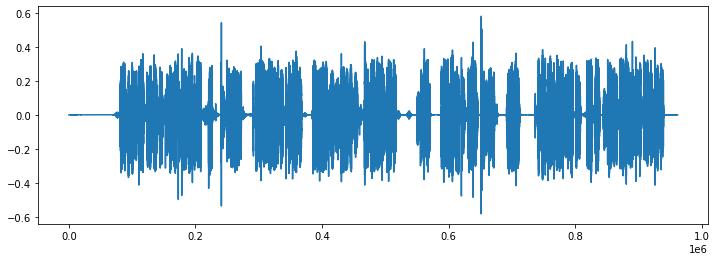

NameError: name 'plot' is not defined

In [84]:
# Librosa: mono track
plt.figure(figsize=(12,4))
plt.plot(librosa_audio)
# plt.savefig('librosa_audio.png')

plt.show('librosa_audio')

plot.subplot(212)
plot.specgram(librosa_audio, librosa_sample_rate)
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.show()

In [85]:
# getting mfcc features of a on audio file

mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 40)

In [86]:
print(mfccs.shape)

(40, 1880)


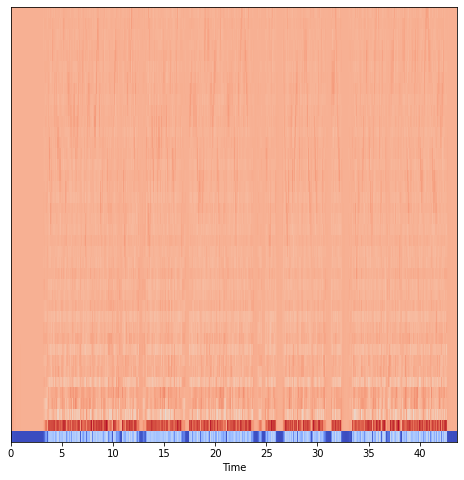

In [87]:
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')
# plt.savefig('MFCCs.png')
plt.show('MFCCs')

In [88]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

# audio_dataset_path='/Documents/FYP/New folder2/'
audio_dataset_path='C:/Users/Acer/New folder2'
metadata=pd.read_csv('C:/Users/Acer/metadata/metadata.csv')
metadata.head()

,ID,fold,WaveFileName,M(1)/F(0),class,classID
0,1,1,Paragraph 1.wav,0,ex,1
1,2,1,Paragraph 1_E3.wav,0,ex,1
2,3,2,Paragraph 2_E3.wav,0,ex,1
3,4,3,Paragraph 3.wav,0,ex,1
4,5,3,Paragraph 3_E3.wav,0,ex,1


In [89]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [96]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    
#     os.path.join-concatination
    
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["WaveFileName"]))
    final_class_labels=row["class"]
    WaveFileName=row["WaveFileName"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels,WaveFileName])

20it [00:18,  1.10it/s]


In [97]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class','WaveFileName'])
extracted_features_df.head()

,feature,class,WaveFileName
0,"[-364.26843, 133.01819, -24.675884, 8.959542, ...",ex,Paragraph 1.wav
1,"[-379.7584, 119.46006, -3.1752982, 25.193275, ...",ex,Paragraph 1_E3.wav
2,"[-372.14462, 109.9578, -4.0556326, 23.574858, ...",ex,Paragraph 2_E3.wav
3,"[-358.9428, 140.10698, -32.130047, 9.779251, 1...",ex,Paragraph 3.wav
4,"[-360.11084, 110.73412, -5.859069, 26.68007, 0...",ex,Paragraph 3_E3.wav


In [98]:
# #save the data to a csv_file.

extracted_features_df.to_csv("extracted_features_df.csv")

In [104]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

#First, we’ll load in a demo track
def spectrogram(file)
    y, sr = librosa.load(librosa.ex('file_name'))

#first computing the short-time Fourier transform
#then mapping the magnitudes to a decibel scale.

    D = librosa.stft(y)  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

#pyplot interface:

    plt.figure(figsize=(14, 5))
    librosa.display.specshow(S_db)
    plt.colorbar()
    return spectrogram
#     X = librosa.stft(x)
# Xdb = librosa.amplitude_to_db(abs(X))
# plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
# plt.colorbar()

In [105]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
spectrograms=[]
for index_num,row in tqdm(metadata.iterrows()):
    
#     os.path.join-concatination
    
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["WaveFileName"]))
    final_class_labels=row["class"]
    WaveFileName=row["WaveFileName"]
    data=spectrogram(file_name)
    spectrograms.append([data,final_class_labels,WaveFileName])

0it [00:00, ?it/s]


ParameterError: Unknown example key: C:\Users\Acer\New folder2\fold1/Paragraph 1.wav

In [33]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [35]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [36]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/100
1/1 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0

In [37]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

1.0


In [39]:
X_test[1]

array([-3.7975839e+02,  1.1946006e+02, -3.1752982e+00,  2.5193275e+01,
       -1.7896004e+00, -1.2528812e+01, -1.2350080e+01, -5.9538789e+00,
       -1.2460033e+01, -7.7553004e-01, -2.0650270e+01, -1.8160813e+00,
       -5.6581173e+00, -6.8783646e+00, -1.8504014e+00, -4.0575571e+00,
       -9.0357857e+00, -5.8958206e+00, -6.2288389e+00, -8.4149446e+00,
       -3.4732339e+00, -6.4005756e+00, -4.3554401e+00, -4.0774570e+00,
       -4.2103105e+00,  4.1372356e-01, -4.9468298e+00, -3.8253043e+00,
       -3.8419302e+00, -1.8925261e+00,  1.1061693e+00,  4.7757067e-02,
       -2.5865183e+00, -2.0379953e+00,  8.9760381e-01, -1.9932790e+00,
       -1.4744837e+00, -1.4325414e+00,  1.0008938e-01, -1.8661225e+00],
      dtype=float32)

In [40]:
model.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [1]])

In [ ]:
# Testing Some Test Audio Data

# Steps

# Preprocess the new audio data
# predict the classes
# Invere transform your Predicted Label

In [13]:
#Extract the audio files into a list and shuffle it.

filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
filenames = tf.random.shuffle(filenames)
num_samples = len(filenames)
print('Number of total examples:', num_samples)
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir/commands[0]))))
print('Example file tensor:', filenames[0])

Number of total examples: 24
Number of examples per label: 5
Example file tensor: tf.Tensor(b'Documents\\FYP\\New folder\\p5\\Paragraph 5_E1.wav', shape=(), dtype=string)


In [21]:
#Split the files into training, validation and test sets using a 80:10:10 ratio, respectively.

train_files = filenames[:6400]
val_files = filenames[6400: 6400 + 800]
test_files = filenames[-800:]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training set size 6400
Validation set size 800
Test set size 800


In [22]:
#binary to tensors converting

def decode_audio(audio_binary):
  audio, _ = tf.audio.decode_wav(audio_binary) #To load an audio file, you will use tf.audio.decode_wav, which returns the WAV-encoded audio as a Tensor and the sample rate.
#Note that tf.audio.decode_wav will normalize the values to the range [-1.0, 1.0].
  return tf.squeeze(audio, axis=-1)

In [23]:
#label for each WAV file is its parent directory
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)

  return parts[-2]

In [24]:
#method to take filename of the WAV file
#output a tuple containing the audio and labels for supervised training.
def get_waveform_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  waveform = decode_audio(audio_binary)
  return waveform, label

In [30]:
#apply process_path to build your training set
#to extract the audio-label pairs and check the results.

AUTOTUNE = tf.data.experimental.AUTOTUNE
files_ds = tf.data.Dataset.from_tensor_slices(train_files)
waveform_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)

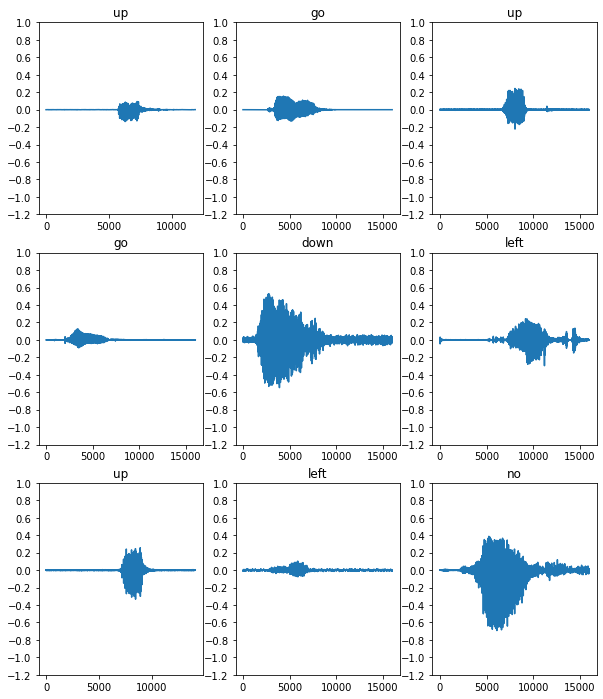

In [32]:
#examine a few audio waveforms with their corresponding labels.

rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

In [33]:
#convert the waveform into a spectrogram
#Shows frequency changes over time
#can be represented as a 2D image. 
#This can be done by applying the short-time Fourier transform (STFT) to convert the audio into the time-frequency domain.

def get_spectrogram(waveform):
  # Padding for files with less than 16000 samples
  zero_padding = tf.zeros([16000] - tf.shape(waveform), dtype=tf.float32)

  # Concatenate audio with padding so that all audio clips will be of the 
  # same length

  waveform = tf.cast(waveform, tf.float32)
  equal_length = tf.concat([waveform, zero_padding], 0)
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)

  spectrogram = tf.abs(spectrogram)

  return spectrogram


In [35]:
#Compare the waveform, the spectrogram and the actual audio of one example from the dataset

for waveform, label in waveform_ds.take(2):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)
print('Waveform shape:', waveform.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Audio playback')
display.display(display.Audio(waveform, rate=16000))

Label: go
Waveform shape: (16000,)
Spectrogram shape: (124, 129)
Audio playback


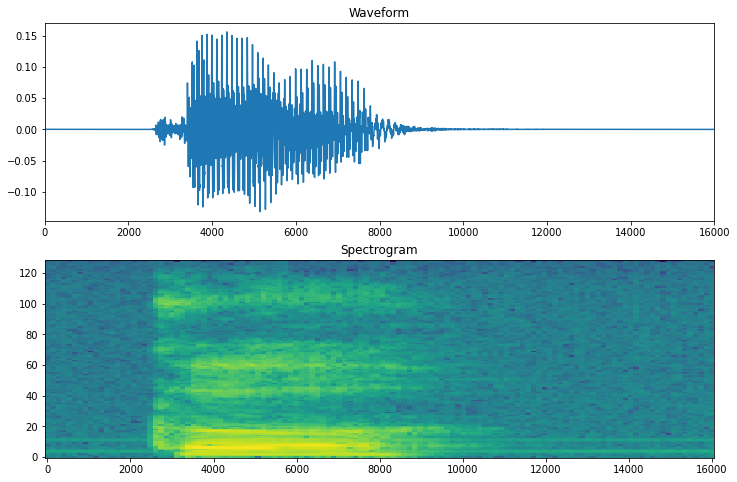

In [36]:
def plot_spectrogram(spectrogram, ax):
  
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
  

  log_spec = np.log(spectrogram.T)
  height = log_spec.shape[0]
  X = np.arange(16000, step=height + 1)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec, shading='nearest')


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])
plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [37]:
#transform the waveform dataset 
#to have spectrogram images and their corresponding labels as integer IDs.

def get_spectrogram_and_label_id(audio, label):
  spectrogram = get_spectrogram(audio)
  spectrogram = tf.expand_dims(spectrogram, -1)
  label_id = tf.argmax(label == commands)
  return spectrogram, label_id

In [38]:
spectrogram_ds = waveform_ds.map(
    get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE)

<ipython-input-36-43d9025060c3>:7: RuntimeWarning: divide by zero encountered in log
  log_spec = np.log(spectrogram.T)


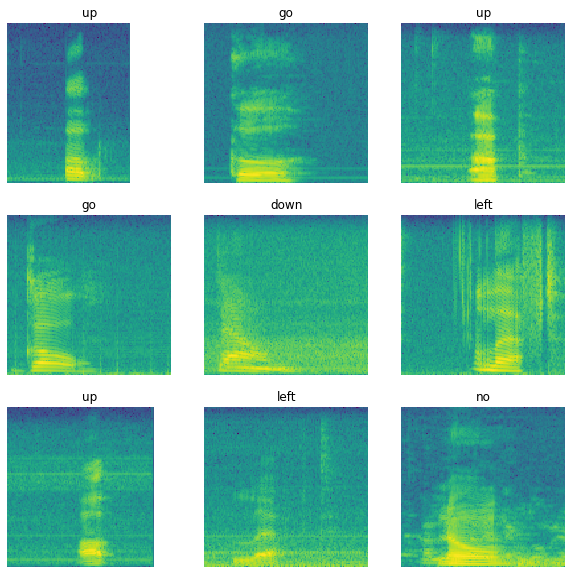

In [39]:
#spectrogram "images" for different samples of the dataset

rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(np.squeeze(spectrogram.numpy()), ax)
  ax.set_title(commands[label_id.numpy()])
  ax.axis('off')

plt.show()